# [【SOTA】マイナビ × SIGNATE Student Cup 2019: 賃貸物件の家賃予測](https://signate.jp/competitions/264)

## 1. データ読み込み

In [67]:
import pandas as pd
import numpy as np
import pathlib
import os

# 学習データ、テストデータの読み込み
train_path = pathlib.Path("./DATA/train.csv")
test_path = pathlib.Path("./DATA/test.csv")

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [68]:
test_data.head()

,id,所在地,アクセス,間取り,築年数,方角,面積,所在階,バス・トイレ,キッチン,放送・通信,室内設備,駐車場,周辺環境,建物構造,契約期間
0,31471,東京都世田谷区深沢５丁目1-27,東急大井町線\t等々力駅\t徒歩15分\t\t東急田園都市線\t桜新町駅\t徒歩24分\t\...,2LDK,49年0ヶ月,南,50.22m2,8階／8階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座／...,ガスコンロ／\tコンロ3口／\tシステムキッチン\t／\t給湯／\tL字キッチン,インターネット対応,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\tエレベーター\t公営水...,駐輪場\t空有\t駐車場\t無\tバイク置き場\t無,【コンビニ】 74m\t【スーパー】 215m\t【病院】 313m\t【小学校】 219m...,鉄骨造,NaN
1,31472,東京都目黒区八雲１丁目11-8,東急東横線\t都立大学駅\t徒歩6分\t\t東急東横線\t自由が丘駅\t徒歩17分\t\t東...,1R,0年2ヶ月,南東,20.88m2,3階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,ガスコンロ／\tコンロ2口／\tシステムキッチン\t／\t給湯,インターネット対応／\tCSアンテナ／\tBSアンテナ／\tインターネット使用料無料,エアコン付\tシューズボックス／\tフローリング／\t室内洗濯機置場\t公営水道／\t下水／...,"駐車場\t近隣\t34,000円(税込)\t距離200m\t駐輪場\t無\tバイク置き場\t無",【スーパー】 128m\t【スーパー】 313m\t【コンビニ】 374m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間
2,31473,東京都豊島区池袋本町２丁目22-2,東武東上線\t北池袋駅\t徒歩10分\t\t埼京線\t板橋駅\t徒歩16分\t\t山手線\t...,1K,23年4ヶ月,南東,26.93m2,1階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座,ガスコンロ／\t給湯,インターネット対応／\t光ファイバー／\tCATV,エアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t2面採光／\t室内洗濯...,"駐車場\t空有\t5,000円(税込)\t(敷金あり\t1ヶ月)\t駐輪場\t空有\tバイク...",【スーパー】 529m\t【スーパー】 810m\t【コンビニ】 316m\t【コンビニ】 ...,鉄骨造,2年間
3,31474,東京都杉並区和泉１丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩10分\t\t京王線\t代田橋駅\t徒歩8分...,1K,36年2ヶ月,南東,23.57m2,1階／2階建,シャワー,ガスコンロ／\t給湯,NaN,エアコン付\tシューズボックス／\t2面採光／\t室外洗濯機置場\t公営水道／\t下水／\t...,駐輪場\t空有\t0円,【スーパー】 286m\t【スーパー】 702m\t【コンビニ】 489m\t【コンビニ】 ...,木造,2年間
4,31475,東京都杉並区堀ノ内２丁目,丸ノ内線(中野坂上－方南町)\t方南町駅\t徒歩12分\t\t丸ノ内線(池袋－荻窪)\t新高...,2LDK,45年4ヶ月,南,50m2,4階／4階建,専用バス／\t専用トイレ／\tバス・トイレ別,コンロ設置可（口数不明）／\t給湯,インターネット対応,冷房／\tエアコン付\tシューズボックス／\tバルコニー／\tフローリング／\t室内洗濯機置...,"駐車場\t近隣\t22,600円\t距離177m",【コンビニ】 312m\t【コンビニ】 436m\t【スーパー】 902m\t【コンビニ】 ...,RC（鉄筋コンクリート）,2年間


## 2. 前処理

### 2.1. データ選択

In [69]:
train_data_1 = train_data[["id", "所在地", "賃料", "間取り", "築年数", "面積", "所在階", "建物構造"]]
test_data_1 = test_data[["id", "所在地", "間取り", "築年数", "面積", "所在階", "建物構造"]]

### 2.2. 間取りの数値化

In [70]:
# 間取りにlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["間取り"],test_data_1["間取り"]]))

train_data_1["間取りID"] = le.transform(train_data_1["間取り"])
test_data_1["間取りID"] = le.transform(test_data_1["間取り"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 2.3. 面積の数値化

In [71]:
# 面積のカラムタイトルを面積[m2]に置換
train_data_1 = train_data_1.rename(columns={"面積": "面積m2"})
test_data_1 = test_data_1.rename(columns={"面積": "面積m2"})

In [72]:
# カラムタイトル面積[m2]の要素からm2を削除
train_data_1['面積m2'] = train_data_1['面積m2'].str.replace('m2', '').astype(float)
test_data_1['面積m2'] = test_data_1['面積m2'].str.replace('m2', '').astype(float)

### 2.4. 所在階の数値化

In [73]:
# 所在階の中身を"／"で2つの列に分割
train_data_1 = pd.concat([train_data_1, train_data_1['所在階'].str.split('／', expand=True)], axis=1)
test_data_1 = pd.concat([test_data_1, test_data_1['所在階'].str.split('／', expand=True)], axis=1)

In [74]:
# 分割した所在階のカラム名変更　0:所在、1:階層
train_data_1 = train_data_1.rename(columns={0:"所在", 1:"階層"})
test_data_1 = test_data_1.rename(columns={0:"所在", 1:"階層"})

In [75]:
# 所在と階層の要素を整形
train_data_1['所在'] = train_data_1['所在'].str.replace('階', '')
train_data_1['所在'] = train_data_1['所在'].str.replace('建', '')
train_data_1['所在'] = train_data_1['所在'].str.replace('地下', '-')
train_data_1['所在'] = train_data_1['所在'].str.replace('\（.*\）', '', regex=True)
train_data_1['階層'] = train_data_1['階層'].str.replace('階建', '')
train_data_1['階層'] = train_data_1['階層'].str.replace('\（.*\）', '', regex=True)
train_data_1['所在'] = train_data_1['所在'].replace('', np.nan)

test_data_1['所在'] = test_data_1['所在'].str.replace('階', '')
test_data_1['所在'] = test_data_1['所在'].str.replace('建', '')
test_data_1['所在'] = test_data_1['所在'].str.replace('地下', '-')
test_data_1['所在'] = test_data_1['所在'].str.replace('\（.*\）', '', regex=True)
test_data_1['階層'] = test_data_1['階層'].str.replace('階建', '')
test_data_1['階層'] = test_data_1['階層'].str.replace('\（.*\）', '', regex=True)
test_data_1['所在'] = test_data_1['所在'].replace('', np.nan)

In [76]:
# # "階層"がNoneの箇所を"所在"の値で埋める
# train_data_1['階層'].fillna(train_data_1['所在'], inplace=True)
# test_data_1['階層'].fillna(test_data_1['所在'], inplace=True)

In [77]:
# 所在と階層の要素をfloat型に変換する
train_data_1['所在'] = train_data_1['所在'].astype(float)
train_data_1['階層'] = train_data_1['階層'].astype(float)

test_data_1['所在'] = test_data_1['所在'].astype(float)
test_data_1['階層'] = test_data_1['階層'].astype(float)

In [78]:
# 所在階のカラムを削除
train_data_1 = train_data_1.drop('所在階', axis=1)
test_data_1 = test_data_1.drop('所在階', axis=1)

In [79]:
# # 所在のNaNを埋める
# train_data_1.loc[train_data_1["所在"].isnull(), "所在"] = train_data_1["階層"]
# test_data_1.loc[test_data_1["所在"].isnull(), "所在"] = test_data_1["階層"]

In [80]:
# # 所在も階層も空欄のデータは間取りと面積の近いデータで埋める
# print(test_data_1[(test_data_1["間取りID"] == 21) & (test_data_1["面積m2"] > 90) & (test_data_1["面積m2"] < 95)].mean())
# test_data_1.loc[test_data_1["id"]==40675, "所在"] = float(6)
# test_data_1.loc[test_data_1["id"]==40675, "階層"] = float(9)

### 2.5. 築年数の数値化

In [81]:
# 新築の場合は全て0にする
train_data_1.loc[train_data_1["築年数"]=="新築", "築年数"] = float(0)
test_data_1.loc[test_data_1["築年数"]=="新築", "築年数"] = float(0)

In [82]:
# 築年数を数値に変換する
train_data_1 = pd.concat([train_data_1, train_data_1['築年数'].str.split('年', expand=True)], axis=1)
test_data_1 = pd.concat([test_data_1, test_data_1['築年数'].str.split('年', expand=True)], axis=1)

In [83]:
# ヶ月を消す
train_data_1[1] = train_data_1[1].str.replace('ヶ月', '')
test_data_1[1] = test_data_1[1].str.replace('ヶ月', '')

In [84]:
# 築年数をfloat変換
train_data_1["築年数"] = train_data_1[0].astype(float) + (train_data_1[1].astype(float) / float(10))
test_data_1["築年数"] = test_data_1[0].astype(float) + (test_data_1[1].astype(float) / float(10))

In [85]:
test_data_1.head()

,id,所在地,間取り,築年数,面積m2,建物構造,間取りID,所在,階層,0,1
0,31471,東京都世田谷区深沢５丁目1-27,2LDK,49.0,50.22,鉄骨造,14,8.0,8.0,49,0
1,31472,東京都目黒区八雲１丁目11-8,1R,0.2,20.88,RC（鉄筋コンクリート）,9,3.0,4.0,0,2
2,31473,東京都豊島区池袋本町２丁目22-2,1K,23.4,26.93,鉄骨造,3,1.0,4.0,23,4
3,31474,東京都杉並区和泉１丁目,1K,36.2,23.57,木造,3,1.0,2.0,36,2
4,31475,東京都杉並区堀ノ内２丁目,2LDK,45.4,50.00,RC（鉄筋コンクリート）,14,4.0,4.0,45,4


In [86]:
print(test_data_1[test_data_1["築年数"].isnull()])

          id               所在地       間取り  築年数   面積m2          建物構造  間取りID  \
77     31548      東京都大田区東矢口２丁目  1K+S(納戸)  NaN  23.80           鉄骨造      4   
108    31579  東京都世田谷区上馬２丁目26-8        1K  NaN  26.44  RC（鉄筋コンクリート）      3   
112    31583       東京都台東区台東２丁目      1LDK  NaN  41.65           鉄骨造      5   
156    31627  東京都品川区南大井４丁目20-5        1R  NaN  20.56  RC（鉄筋コンクリート）      9   
162    31633     東京都江東区扇橋２丁目23        1K  NaN  25.34  RC（鉄筋コンクリート）      3   
...      ...               ...       ...  ...    ...           ...    ...   
31141  62612  東京都世田谷区桜丘４丁目15-9      2LDK  NaN  60.81            木造     14   
31176  62647   東京都江戸川区中葛西８丁目22      1LDK  NaN  40.06  RC（鉄筋コンクリート）      5   
31181  62652       東京都新宿区原町３丁目      1LDK  NaN  40.26           鉄骨造      5   
31182  62653       東京都新宿区原町３丁目      2LDK  NaN  54.75           鉄骨造     14   
31212  62683       東京都新宿区原町３丁目      1LDK  NaN  40.79           鉄骨造      5   

        所在    階層    0    1  
77     2.0   3.0  NaN  NaN  
108    7.0  13.0 

In [87]:
# 0と1の列を消す
train_data_1 = train_data_1.drop(0, axis=1)
train_data_1 = train_data_1.drop(1, axis=1)

test_data_1 = test_data_1.drop(0, axis=1)
test_data_1 = test_data_1.drop(1, axis=1)

### 2.6. 緯度経度情報の追加

#### [このサイト](https://ktgis.net/gcode/geocoding.html)を利用する

In [88]:
# IDと住所をファイル出力
train_coordinate = train_data[["id", "所在地"]]
test_coordinate = test_data[["id", "所在地"]]

train_coordinate.to_csv("train_coordinate.csv", header=False, index=False)
test_coordinate.to_csv("test_coordinate.csv", header=False, index=False)

In [89]:
# 緯度、経度情報の読み込み(id, 所在地, 経度, 緯度)
train_coordinate_addvalue = pd.read_excel("train_coordinate_addvalue.xlsx")
test_coordinate_addvalue = pd.read_excel("test_coordinate_addvalue.xlsx")

In [90]:
train_data_1 = pd.merge(train_data_1, train_coordinate_addvalue[["id", "経度", "緯度"]], on='id')
test_data_1 = pd.merge(test_data_1, test_coordinate_addvalue[["id", "経度", "緯度"]], on='id')

### 2.7. 部屋数の追加

In [91]:
# 部屋数のマージ
number_of_rooms = pd.read_excel("number_of_rooms.xlsx")
train_data_1 = pd.merge(train_data_1, number_of_rooms[["間取り", "部屋数"]], on='間取り')
test_data_1 = pd.merge(test_data_1, number_of_rooms[["間取り", "部屋数"]], on='間取り')

In [92]:
# インデックスの振り直し
train_data_1 = train_data_1.sort_values("id")
train_data_1 = train_data_1.reset_index(drop=True)

test_data_1 = test_data_1.sort_values("id")
test_data_1 = test_data_1.reset_index(drop=True)

### 2.8. 1部屋当たりの面積追加

In [93]:
# 面積と部屋数から1部屋当たりの面積を算出
train_data_1["1部屋当たり面積m2"] = (train_data_1["面積m2"] / train_data_1["部屋数"]).astype(float)
test_data_1["1部屋当たり面積m2"] = (test_data_1["面積m2"] / test_data_1["部屋数"]).astype(float)

In [94]:
# 間取りと間取りIDは削除する
train_data_1 = train_data_1.drop('間取り', axis=1)
test_data_1 = test_data_1.drop('間取り', axis=1)

# train_data_1 = train_data_1.drop('間取りID', axis=1)
# test_data_1 = test_data_1.drop('間取りID', axis=1)

#### 2.9. 建物の高さ率を追加(高さ率=所在/階層)

In [95]:
# 高さ率の算出
train_data_1["高さ率"] = (train_data_1["所在"] / train_data_1["階層"]).astype(float)
test_data_1["高さ率"] = (test_data_1["所在"] / test_data_1["階層"]).astype(float)

### 2.10. 建物構造の数値化

In [96]:
train_data_1["建物構造"].value_counts()

RC（鉄筋コンクリート）                   17505
木造                              5512
鉄骨造                             3726
SRC（鉄骨鉄筋コンクリート）                 2429
軽量鉄骨                            1812
ALC（軽量気泡コンクリート）                  297
その他                              136
PC（プレキャスト・コンクリート（鉄筋コンクリート））       46
HPC（プレキャスト・コンクリート（重量鉄骨））           4
ブロック                               3
Name: 建物構造, dtype: int64

In [97]:
# 建物構造にlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["建物構造"],test_data_1["建物構造"]]))

train_data_1["建物構造ID"] = le.transform(train_data_1["建物構造"])
test_data_1["建物構造ID"] = le.transform(test_data_1["建物構造"])

In [98]:
test_data_1.head()

,id,所在地,築年数,面積m2,建物構造,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID
0,31471,東京都世田谷区深沢５丁目1-27,49.0,50.22,鉄骨造,14,8.0,8.0,139.652762,35.617708,3.5,14.348571,1.00,10
1,31472,東京都目黒区八雲１丁目11-8,0.2,20.88,RC（鉄筋コンクリート）,9,3.0,4.0,139.672871,35.617709,1.0,20.880000,0.75,3
2,31473,東京都豊島区池袋本町２丁目22-2,23.4,26.93,鉄骨造,3,1.0,4.0,139.709049,35.741996,1.0,26.930000,0.25,10
3,31474,東京都杉並区和泉１丁目,36.2,23.57,木造,3,1.0,2.0,139.658270,35.673602,1.0,23.570000,0.50,7
4,31475,東京都杉並区堀ノ内２丁目,45.4,50.00,RC（鉄筋コンクリート）,14,4.0,4.0,139.650468,35.689411,3.5,14.285714,1.00,3


In [99]:
# 不要になった建物構造カラムを削除する
train_data_1 = train_data_1.drop('建物構造', axis=1)
test_data_1 = test_data_1.drop('建物構造', axis=1)

### 2.11. 新規カラムに「賃料/面積」を追加

In [100]:
train_data_1["賃料/面積"] = train_data_1["賃料"] / train_data_1["面積m2"]

In [101]:
train_data_1.head()

,id,所在地,賃料,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,賃料/面積
0,1,東京都北区滝野川３丁目,75000,9.9,20.01,3,1.0,12.0,139.727873,35.747759,1.0,20.01,0.083333,3,3748.125937
1,2,東京都中央区月島３丁目,76000,45.0,16.50,9,5.0,10.0,139.780485,35.662406,1.0,16.50,0.500000,10,4606.060606
2,3,東京都渋谷区笹塚２丁目,110000,8.6,22.05,3,12.0,15.0,139.667375,35.675358,1.0,22.05,0.800000,3,4988.662132
3,4,東京都杉並区高円寺南２丁目23-2,150000,29.4,60.48,14,3.0,4.0,139.648495,35.700193,3.5,17.28,0.750000,3,2480.158730
4,5,東京都葛飾区金町３丁目7-2,74000,31.7,39.66,10,1.0,2.0,139.872315,35.766413,3.0,13.22,0.500000,7,1865.859808


### 2.12. 東京23区の地域ごとに、住宅地の平均地価情報を追加

In [102]:
# 区の情報の確認(23区だけだった)
# sample = train_data["所在地"].str.extract("東京都(.+区)", expand=True)
# sample.value_counts()

In [103]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [104]:
# 訓練データとテストデータに、エリア情報を追加
train_data_1["エリア"] = ""
test_data_1["エリア"] = ""
train_data_1["エリア"] = train_data_1["所在地"].str.extract("東京都((.+区.+?)[０-９]|(.+区.+?)[0-9]|(.+区.+))", expand=True)
test_data_1["エリア"] = test_data_1["所在地"].str.extract("東京都((.+区.+?)[０-９]|(.+区.+?)[0-9]|(.+区.+))", expand=True)

In [105]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [106]:
# 一部エリア情報に数値が残ってしまうので、消す
train_data_1["エリア"] = train_data_1["エリア"].str.replace("[０-９]|[0-9]", "")
train_data_1["エリア"] = train_data_1["エリア"].str.replace("一丁目", "")
train_data_1["エリア"] = train_data_1["エリア"].str.replace("-", "")

test_data_1["エリア"] = test_data_1["エリア"].str.replace("[０-９]|[0-9]", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("一丁目", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("二丁目", "")
test_data_1["エリア"] = test_data_1["エリア"].str.replace("四丁目", "")

In [107]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [108]:
# 坪単価情報の読込～結合
wards_value = pd.read_excel("23区_地域毎_坪単価.xlsx")
train_data_1 = pd.merge(train_data_1, wards_value, on="エリア", how="left")
test_data_1 = pd.merge(test_data_1, wards_value, on="エリア", how="left")
train_data_1 = train_data_1.sort_values("id")
test_data_1 = test_data_1.sort_values("id")

In [109]:
# 地価の抜けデータを平均値で補間
# 江東区
train_data_1.loc[train_data_1["id"]==2767, "区"] = "江東区"
train_data_1.loc[train_data_1["id"]==7559, "区"] = "江東区"
train_data_1.loc[train_data_1["id"]==2767, "平均坪単価（万円）"] = 206.6
train_data_1.loc[train_data_1["id"]==7559, "平均坪単価（万円）"] = 206.6
# 港区
train_data_1.loc[train_data_1["id"]==17654, "区"] = "港区"
train_data_1.loc[train_data_1["id"]==17654, "平均坪単価（万円）"] = 1321.4

In [110]:
print(len(train_data_1))
print(len(test_data_1))

31470
31262


In [111]:
print(train_data_1[train_data_1["平均坪単価（万円）"].isnull()])
print(test_data_1[test_data_1["平均坪単価（万円）"].isnull()])

Empty DataFrame
Columns: [id, 所在地, 賃料, 築年数, 面積m2, 間取りID, 所在, 階層, 経度, 緯度, 部屋数, 1部屋当たり面積m2, 高さ率, 建物構造ID, 賃料/面積, エリア, 区, 地名, 平均坪単価（万円）]
Index: []
Empty DataFrame
Columns: [id, 所在地, 築年数, 面積m2, 間取りID, 所在, 階層, 経度, 緯度, 部屋数, 1部屋当たり面積m2, 高さ率, 建物構造ID, エリア, 区, 地名, 平均坪単価（万円）]
Index: []


### 2.13. 区IDの追加

In [112]:
# 区にlabel encodingを適用
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(pd.concat([train_data_1["区"],test_data_1["区"]]))

train_data_1["区ID"] = le.transform(train_data_1["区"])
test_data_1["区ID"] = le.transform(test_data_1["区"])

In [113]:
# 不要なカラムを削除する
train_data_1 = train_data_1.drop(["所在地", "エリア", "区", "地名"], axis=1)
test_data_1 = test_data_1.drop(["所在地", "エリア", "区", "地名"], axis=1)

### 2.14. 重複物件の抽出・削除

In [114]:
# 重複確認用のデータ出力
# train_duplicate = pd.concat([train_data[["id", "賃料", "所在地"]], train_data_1[["間取りID", "面積m2", "所在", "階層"]]], axis=1)
# test_duplicate = pd.concat([test_data[["id", "所在地"]], test_data_1[["間取りID", "面積m2", "所在", "階層"]]], axis=1)

In [115]:
# 結果の出力
# train_duplicate.to_excel("train_duplicate.xlsx", header=True, index=False)
# test_duplicate.to_excel("test_duplicate.xlsx", header=True, index=False)

In [116]:
# 重複対象のデータ読み込み
train_duplicate_flag = pd.read_excel("train_duplicate_flag.xlsx")
test_duplicate_flag = pd.read_excel("test_duplicate_flag.xlsx")

In [117]:
# データ数のチェック
print("Train:", len(train_data_1), "-", len(train_duplicate_flag), "=", len(train_data_1)-len(train_duplicate_flag))
print("Test:", len(test_data_1), "-", len(test_duplicate_flag), "=", len(test_data_1)-len(test_duplicate_flag))

Train: 31470 - 31470 = 0
Test: 31262 - 31262 = 0


In [118]:
# 重複フラグを結合
train_data_1 = pd.merge(train_data_1, train_duplicate_flag, on="id")
train_data_1 = train_data_1.rename(columns={"賃料_x":"賃料"})
train_data_1 = train_data_1.drop('賃料_y', axis=1)

test_data_1 = pd.merge(test_data_1, test_duplicate_flag, on="id")

In [119]:
# testデータからのみ、flag=1.0の列を削除
print("【削除前】", "train:", len(train_data_1), ", ", "test:", len(test_data_1))
#train_data_1 = train_data_1.loc[train_data_1["flag"] != 1.0]
test_data_1 = test_data_1.loc[test_data_1["flag"] != 1.0]
print("【削除後】", "train:", len(train_data_1), ", ", "test:", len(test_data_1))

【削除前】 train: 31470 ,  test: 31262
【削除後】 train: 31470 ,  test: 24812


## 3. データチェック

In [120]:
train_data_1.isnull().sum()

id                0
賃料                0
築年数             889
面積m2              0
間取りID             0
所在              120
階層              594
経度                0
緯度                0
部屋数               0
1部屋当たり面積m2        0
高さ率             714
建物構造ID            0
賃料/面積             0
平均坪単価（万円）         0
区ID               0
flag          25975
dtype: int64

In [121]:
test_data_1.isnull().sum()

id                0
築年数             675
面積m2              0
間取りID             0
所在              102
階層              476
経度                0
緯度                0
部屋数               0
1部屋当たり面積m2        0
高さ率             577
建物構造ID            0
平均坪単価（万円）         0
区ID               0
flag          24812
dtype: int64

In [122]:
len(train_data_1)

31470

In [123]:
len(train_data)

31470

In [124]:
len(test_data_1)

24812

In [125]:
len(test_data)

31262

In [126]:
train_data_1.head()

,id,賃料,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,賃料/面積,平均坪単価（万円）,区ID,flag
0,1,75000,9.9,20.01,3,1.0,12.0,139.727873,35.747759,1.0,20.01,0.083333,3,3748.125937,180.0,3,NaN
1,2,76000,45.0,16.50,9,5.0,10.0,139.780485,35.662406,1.0,16.50,0.500000,10,4606.060606,323.0,1,1.0
2,3,110000,8.6,22.05,3,12.0,15.0,139.667375,35.675358,1.0,22.05,0.800000,3,4988.662132,324.0,15,NaN
3,4,150000,29.4,60.48,14,3.0,4.0,139.648495,35.700193,3.5,17.28,0.750000,3,2480.158730,253.0,11,NaN
4,5,74000,31.7,39.66,10,1.0,2.0,139.872315,35.766413,3.0,13.22,0.500000,7,1865.859808,111.0,20,NaN


In [127]:
test_data_1.head()

,id,築年数,面積m2,間取りID,所在,階層,経度,緯度,部屋数,1部屋当たり面積m2,高さ率,建物構造ID,平均坪単価（万円）,区ID,flag
0,31471,49.0,50.22,14,8.0,8.0,139.652762,35.617708,3.5,14.348571,1.00,10,208.0,0,NaN
1,31472,0.2,20.88,9,3.0,4.0,139.672871,35.617709,1.0,20.880000,0.75,3,273.0,17,NaN
2,31473,23.4,26.93,3,1.0,4.0,139.709049,35.741996,1.0,26.930000,0.25,10,186.0,21,NaN
3,31474,36.2,23.57,3,1.0,2.0,139.658270,35.673602,1.0,23.570000,0.50,7,184.0,11,NaN
5,31476,25.6,21.45,9,1.0,2.0,139.686023,35.691395,1.0,21.450000,0.50,7,294.0,10,NaN


In [128]:
# IDとflagの削除
train_data_1_no_ID = train_data_1.drop(["id", "flag"], axis=1)
test_data_1_no_ID = test_data_1.drop(["id", "flag"], axis=1)

In [129]:
# 特徴データと目的変数の設定
train_x = train_data_1_no_ID.drop(["賃料", "賃料/面積"], axis=1)
train_y = train_data_1_no_ID["賃料/面積"]

test_x = test_data_1_no_ID

## 4.学習 

In [130]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import KFold

scores = []
# GBDT用のハイパーパラメータ
params = {"objective": "reg:squarederror", "sileng":1, "random_state":71, "eval_metric":"rmse"}
num_round = 50

# クロスバリデーション
kf = KFold(n_splits=4, shuffle=True, random_state=71)
for tr_idx, va_idx, in kf.split(train_x):
    tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
    
    # GBDTで学習実行
    dtrain = xgb.DMatrix(tr_x, label=tr_y) # enable_categorical=True
    dvalid = xgb.DMatrix(va_x, label=va_y)
    dtest = xgb.DMatrix(test_x)
    
    watchlist = [(dtrain, "train"), (dvalid, "eval")]
    model = xgb.train(params, dtrain, num_round, evals=watchlist)

[21:35:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "sileng" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-rmse:2639.01318	eval-rmse:2612.90869
[1]	train-rmse:1895.70606	eval-rmse:1865.32263
[2]	train-rmse:1388.11731	eval-rmse:1349.66858
[3]	train-rmse:1044.64404	eval-rmse:999.77869
[4]	train-rmse:820.98590	eval-rmse:769.41193
[5]	train-rmse:680.77362	eval-rmse:622.57929
[6]	train-rmse:589.88415	eval-rmse:534.80713
[7]	train-rmse:538.33758	eval-rmse:480.82278
[8]	train-rmse:505.46457	eval-rmse:450.26315
[9]	train-rmse:488.77460	eval-rmse:433.39594
[10]	train-rmse:476.11508	eval-rmse:419.98169
[11]	train-rmse:460.16284	eval-rmse:412.31576
[12]	train-rmse:454.59375	eval-rmse:406.83890
[13]	train-rmse:449

## 5. 検証

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['MS Gothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


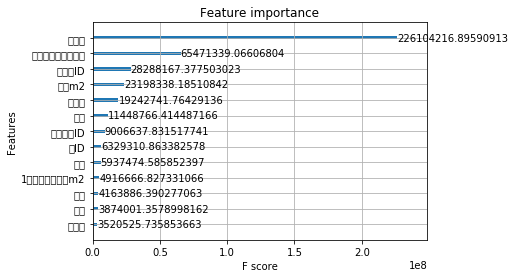

In [144]:
# 特徴量の予測結果への貢献度(Fスコア)を可視化
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
font = {'family' : 'MS Gothic'} # matplotlibのデフォルトフォントをTakaoGothicに設定
plt.rc('font', **font)
xgb.plot_importance(model, importance_type = "gain")
plt.show()

## 6. 予測

In [132]:
# テストデータでの予測
pred = model.predict(dtest)

In [133]:
pred

array([2423.866 , 5363.758 , 2937.1982, ..., 4426.41  , 3807.3123,
       3696.176 ], dtype=float32)

In [134]:
len(pred)

24812

In [135]:
len(test_data_1)

24812

## 7. データ出力

In [136]:
# 予測結果の結合
test_data_1["賃料/面積"] = pred

In [137]:
# 予測結果から賃料を算出し、int型に変換
test_data_1["賃料"] = (test_data_1["面積m2"] * test_data_1["賃料/面積"]).astype(int)

In [138]:
result = test_data_1[["id", "賃料"]]

In [139]:
result

,id,賃料
0,31471,121726
1,31472,111995
2,31473,79098
3,31474,63577
5,31476,70097
...,...,...
31255,62726,102758
31257,62728,103958
31258,62729,100523
31259,62730,174222


In [140]:
len(result)

24812

In [141]:
# 除外していた重複idの賃料を戻す
test_duplicate_rentvalue = pd.read_excel("test_duplicate_rentvalue.xlsx")
result = pd.concat([result, test_duplicate_rentvalue])
result = result.sort_values("id")
len(result)

31262

In [142]:
result

,id,賃料
0,31471,121726
1,31472,111995
2,31473,79098
3,31474,63577
0,31475,90000
...,...,...
31257,62728,103958
31258,62729,100523
31259,62730,174222
6449,62731,280000


In [143]:
result.to_csv("result.csv", header=False, index=False)